In [5]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
import ncxt_sxtcnn

import logging
_ = logging.getLogger("ncxt_sxtcnn.sxtcnn").setLevel(logging.ERROR)
_ = logging.getLogger("ncxtamira").setLevel(logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [6]:
from ncxt_sxtcnn.sxtcnn.loaders import AmiraLoaderx100
from ncxt_sxtcnn.sxtcnn.models import UNet3D
from ncxt_sxtcnn.sxtcnn.processors import RandomBlockProcessor
from ncxt_sxtcnn.sxtcnn.criteria import CrossEntropyLoss_DiceLoss

<IPython.core.display.Javascript object>

In [7]:
from ncxtamira.organelles import LabelTree, Organelles, Node

# _ = Node("newmember", Organelles._root.find('nucleolus'))
Organelles.pptree()

       ┌capillary
       ├buffer
 sample┤
       │    ┌membrane
       │    ├mitochondria
       │    ├chloroplast
       │    ├lipid
       │    ├endoplasmic reticulum
       └cell┤
            │       ┌nucleolus
            ├nucleus┤
            │       ├euchromatin
            │       └heterochromatin
            ├golgi
            └granule


<IPython.core.display.Javascript object>

### Setup Database

Files 30 + 0
loading model model 23484 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 3, 'in_channels': 1, 'start_filts': 32, 'dropout': 0, 'instancenorm': False, 'dirichlet': False, 'depth': 3}
Missing file C:\Users\axela\Documents\2021\ncxtcnn\mock\data44899/23484_state.npy
State not found, training



model 23484 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 3, 'in_channels': 1, 'start_filts': 32, 'dropout': 0, 'instancenorm': False, 'dirichlet': False, 'depth': 3}
model 23484 {'name': 'UNet3D', 'training': True, 'up_mode': 'transpose', 'num_classes': 3, 'in_channels': 1, 'start_filts': 32, 'dropout': 0, 'instancenorm': False, 'dirichlet': False, 'depth': 3}


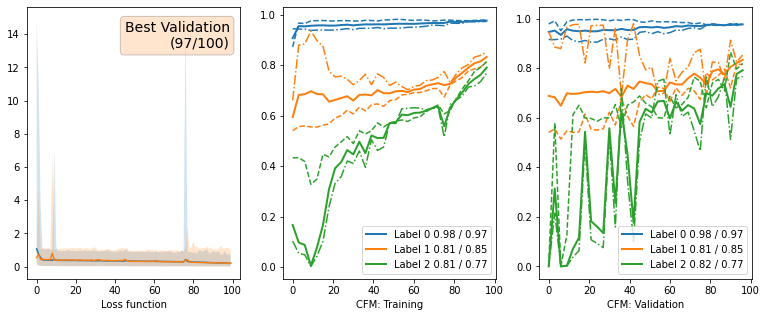

<IPython.core.display.Javascript object>

In [17]:
from ncxt_sxtcnn.pipe import NCXTPipe

db_base = "C:/Users/axela/OneDrive/Documents/2020/mock_NAS/"
wd = "C:/Users/axela/Documents/2021/ncxtcnn/mock/"

pipe = NCXTPipe(
    folder=db_base,
    working_directory=wd,
    organelles=["cell", "nucleus"],
    fold=0,
    sanitize=True,
    settings={"maximum_iterations": 100},
)
pipe.train()
pipe.plot_train()

### Check selected database

In [18]:
pipe.dataframe()

,project,sample,hxpath,void,membrane,nucleus,mitochondria,lipid,vacuole,euchromatin,heterochromatin,ignore,nucleolus,void1,granule,membrane1,endoplasmic reticulum
2,Frydman,Frydman_MG132_NES_Yeast_120_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
3,Frydman,Frydman_MG132_NLS_NES_Yeast_118_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,1.0,2.0,3.0,4.0,,,,,,,,
4,Hammel,1209_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,2.0,,,,,,,
5,Hammel,1216_3,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,,,,2.0,,,,,,,
6,LeGros,LeGros_rad_damage_B_cell_240_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,,5.0,3.0,,2.0,4.0,6.0,,,,,
7,LeGros,LeGros_rad_damage_B_cell_240_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
8,Misc,CSH_Fibroblast_BJ_SmallCell-Axel,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,5,2.0,4.0,3.0,,,,,1.0,,,,
9,Partial,LeGros_AREC_B_cell_152_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
10,Partial,LeGros_rad_damage_B_cell_240_12,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,
11,Partial,LeGros_rad_damage_B_cell_240_22,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1,2.0,4.0,3.0,,,5.0,,,,,,


<IPython.core.display.Javascript object>

### Check loader


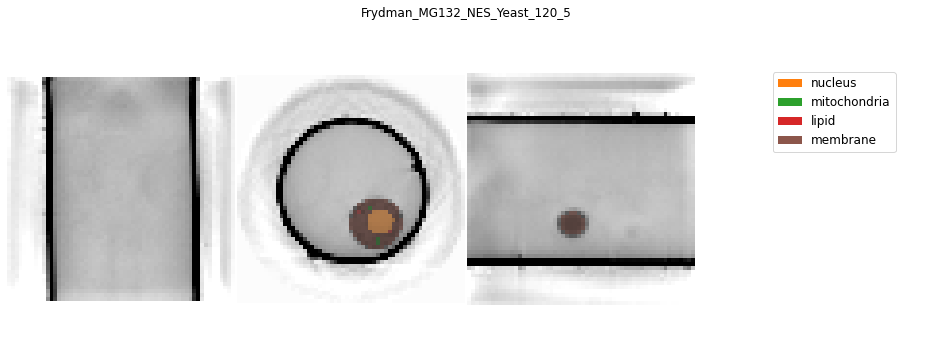

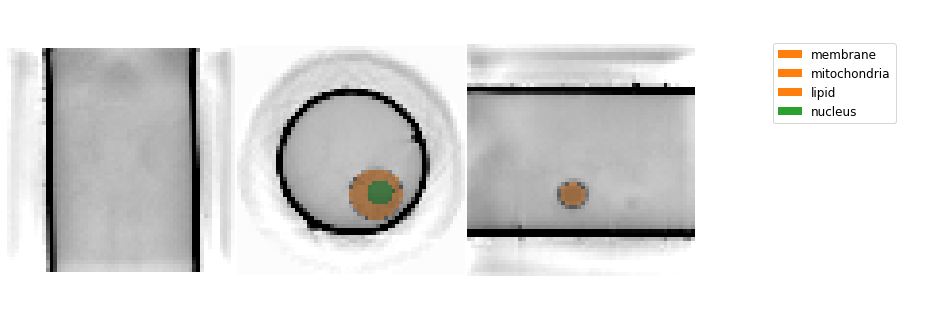

<IPython.core.display.Javascript object>

In [19]:
pipe.check_loader(0)

### Model summary

In [20]:
pipe.model_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 32, 32, 32, 32]             896
         ConvBlock-2       [-1, 32, 32, 32, 32]               0
            Conv3d-3       [-1, 32, 32, 32, 32]          27,680
         ConvBlock-4       [-1, 32, 32, 32, 32]               0
         MaxPool3d-5       [-1, 32, 16, 16, 16]               0
          DownConv-6  [[-1, 32, 16, 16, 16], [-1, 32, 32, 32, 32]]               0
            Conv3d-7       [-1, 64, 16, 16, 16]          55,360
         ConvBlock-8       [-1, 64, 16, 16, 16]               0
            Conv3d-9       [-1, 64, 16, 16, 16]         110,656
        ConvBlock-10       [-1, 64, 16, 16, 16]               0
        MaxPool3d-11          [-1, 64, 8, 8, 8]               0
         DownConv-12  [[-1, 64, 8, 8, 8], [-1, 64, 16, 16, 16]]               0
           Conv3d-13         [-1, 128, 8, 8, 8]         221,312
    

<IPython.core.display.Javascript object>

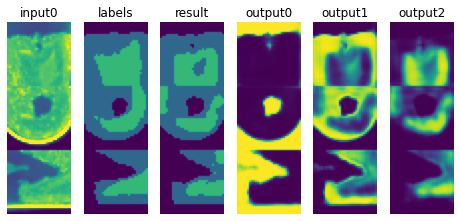

<IPython.core.display.Javascript object>

In [21]:
pipe.sxtcnn.show_training_data()

In [22]:
pipe.sxtcnn.valid_idx[::10]

array([17, 23, 16])

<IPython.core.display.Javascript object>

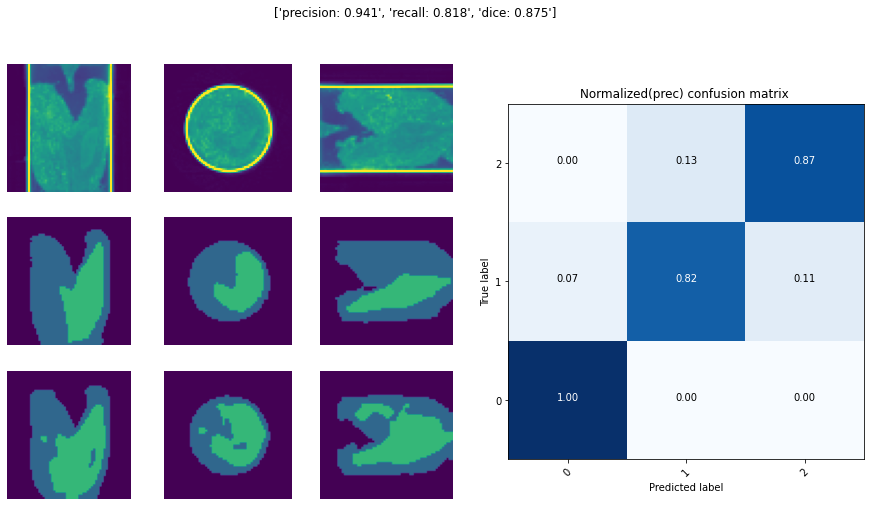

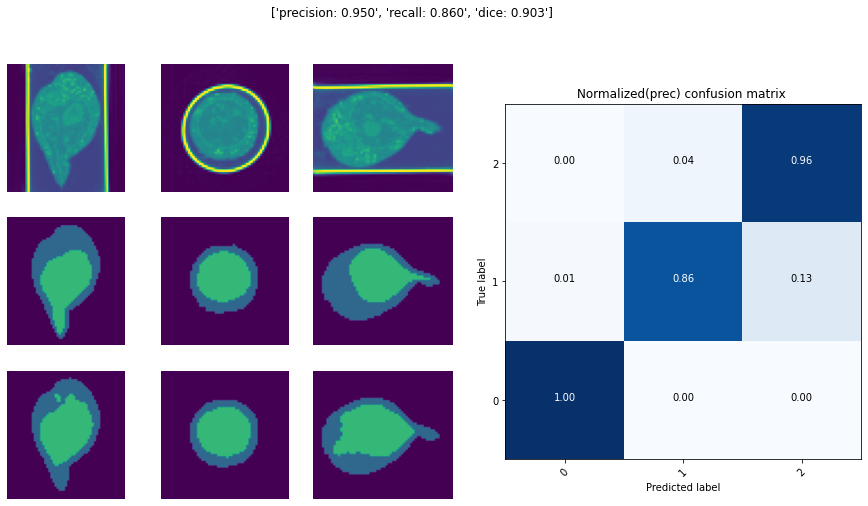

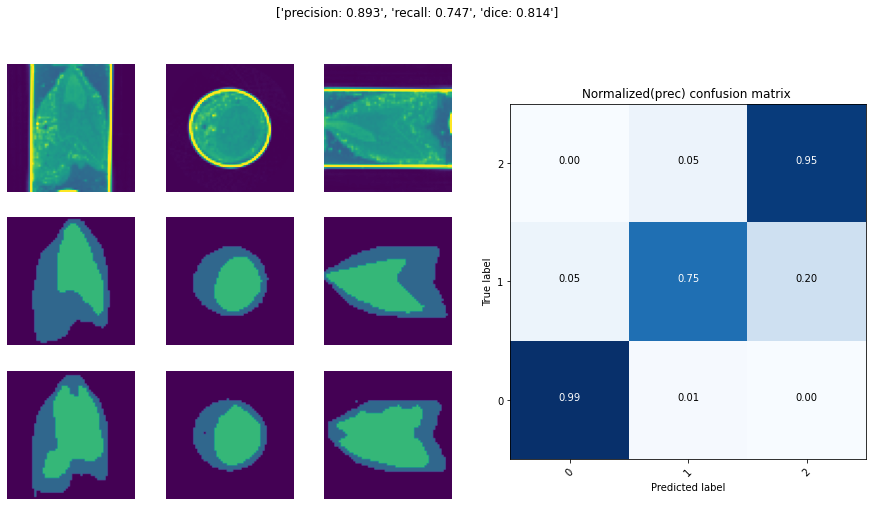

<IPython.core.display.Javascript object>

In [23]:
for index in pipe.sxtcnn.valid_idx[::10]:
    _ = pipe.sxtcnn.evaluate_sample(index, plot=True)